1. Скачать файл по ссылке https://cloud.mail.ru/public/5EMp/5ePzqmXAp - там находятся csv-файлы для выполнения задания.

2. Импортировать датасет из файла 'restaurants.csv' и присвоить его переменной (например, переменной df).

In [19]:
import pandas as pd
df=pd.read_csv("restaurants.csv")

3. Вывести первые 10 строк датафрейма. Изучить структуру таблицы.

In [18]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
df.head(10)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0
5,37650,27579,Архангельск,Суши,3.0,0.0,0.0
6,37127,27250,Астрахань,Суши,55.0,5.0,6.0
7,28476,20266,Астрахань,Суши,342.0,13.0,14.0
8,28478,20266,Астрахань,Суши,194.0,1.0,7.0
9,34127,25077,Астрахань,Пицца,136.0,4.0,1.0


Сколько в датафрейме колонок с типом float64?

In [16]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
vendor_id            784 non-null int64
chain_id             784 non-null int64
city_name            784 non-null object
specialisation       784 non-null object
successful_orders    784 non-null float64
fail_orders          784 non-null float64
reorders             784 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 43.0+ KB
None


Сколько наблюдений в датафрейме?


In [15]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df.shape[0])

784


Сколько наблюдений в датафрейме?


In [20]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df.shape[1])

7


Сколько уникальных городов в датафрейме?


In [29]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print([("city_name", df["city_name"].nunique())])

[('city_name', 63)]


Кол-во ресторанов специализации "Рыба"?

In [34]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df[df['specialisation'] == "Рыба"]["specialisation"].count())

30


Получить в общем среднее кол-во успешных заказов (ответ округлить до целого).

In [36]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df["successful_orders"].mean())

115.34438775510205


Город с самым маленьким количеством ресторанов.


In [50]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df["city_name"].value_counts()[-1:])

Ханты-Мансийск    2
Name: city_name, dtype: int64


Сколько ресторанов имеют более 20 неуспешных заказов?


In [54]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df.fail_orders[df["fail_orders"]>20].count())

10


Сколько ресторанов имеют более 20 неуспешных заказов и менее 500 успешных заказов?

In [57]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print((df.fail_orders[(df["fail_orders"]>20) & (df["successful_orders"]<500)].count()))

5


Среднее кол-во успешных заказов в ресторанах со специализацией "Выпечка" (ответ округлить до целого).

In [59]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df.successful_orders[df['specialisation'] == "Выпечка"].mean())

12.8


Какая специализация имеют самую высокую долю неуспешных заказов (все заказы по конкретному ресторану складываются из успешных, неуспешных заказов и перезаказов)?

In [62]:
import pandas as pd
import numpy as np
df=pd.read_csv("restaurants.csv")
a=0.0
b=""
for it in np.unique(df['specialisation']):
    s1= np.sum(df[df['specialisation']==it]["successful_orders"])
    s2= np.sum(df[df['specialisation']==it]["fail_orders"])
    s3= np.sum(df[df['specialisation']==it]["reorders"])
    if(a<s2/(s1+s2+s3)):
        a=s2/(s1+s2+s3)
        b=it
print(b)

Вегетарианское меню


Максимальное количество успешных заказов в ресторане для специализации "Бургеры".

In [64]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print(df[df['specialisation'] == "Бургеры"]["successful_orders"].max())

506.0


Рассчитать среднее кол-во успешных заказов по специализации "Суши" в городе Белгород (ответ округлить до целого).

In [67]:
import pandas as pd
df=pd.read_csv("restaurants.csv")
print((df.successful_orders[(df['specialisation'] == "Суши") & (df["city_name"]=="Белгород")].mean()))

328.0


Импортировать таблицу "restaurant_scores.csv". В исходную таблицу добавить новый столбец "model_score" из таблицы "restaurant_scores", соединив таблицы по логически подходящему столбцу (id и vendor_id).

Какой средний model_score для chain_id 27399 (ответ округлить до 2 знаков после запятой).

In [78]:
import pandas as pd
df1=pd.read_csv("restaurants.csv")
df2=pd.read_csv("restaurant_scores.csv")
#print(df1.head())
#print(df2.head())
df=pd.merge(df1,df2,left_on='vendor_id', right_on='id')
#print(df.head())
print(df[df.chain_id==27399].model_score.mean())

0.6126930164173244


x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']

popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

Получить следующую визуализацию:

Text(0, 0.5, 'Популярность')

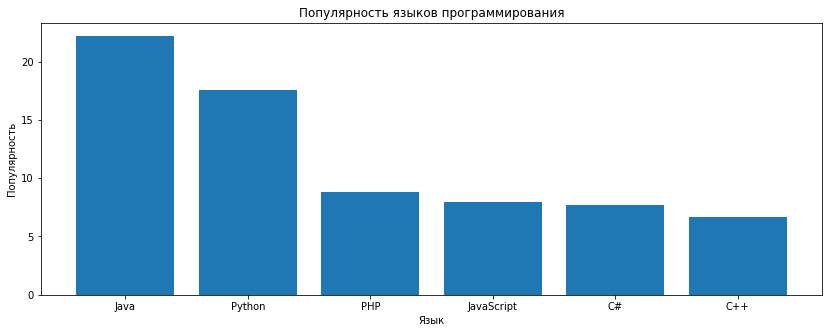

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
fig = plt.figure(figsize= (14,5))
plt.bar(x, popularity)
plt.title('Популярность языков программирования')
plt.xlabel("Язык")
plt.ylabel("Популярность")

Используя лекционный файл partizan.xlsx получить следующую визуализацию:

Text(0.5, 0, 'Заказы')

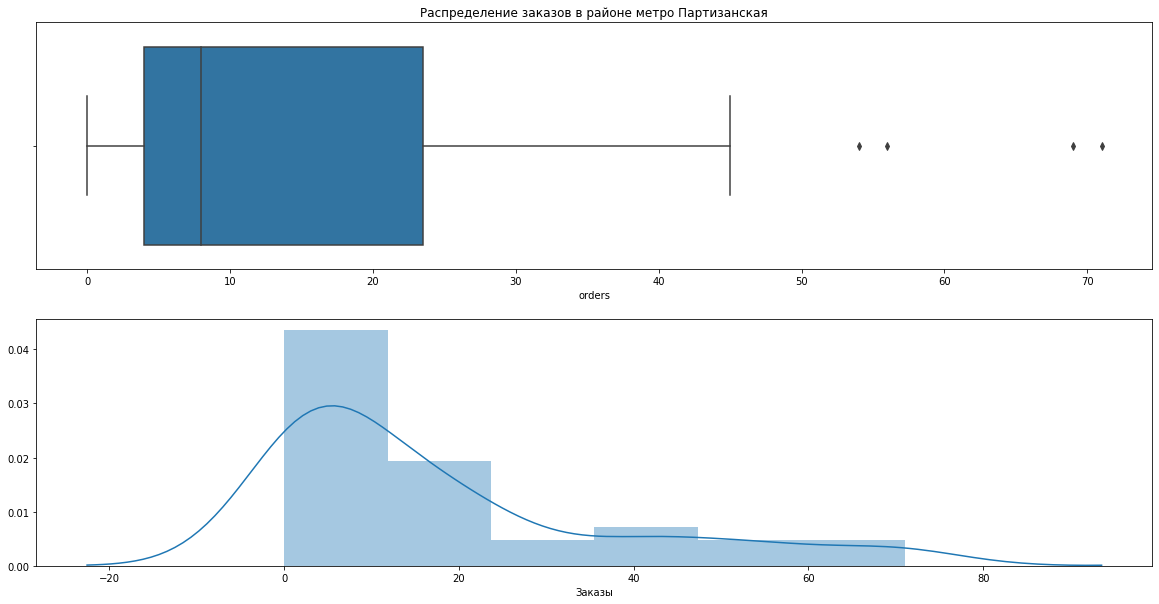

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
df = pd.read_excel("partizan.xlsx")
fig = plt.figure(figsize= (20,10))                                                 
ax1 = fig.add_subplot(211)                                         
ax2 = fig.add_subplot(212)                                         

f = sns.boxplot(df.orders, ax = ax1)                                  
ax1.set_title("Распределение заказов в районе метро Партизанская")

sns.distplot(df.orders, ax = ax2)                                  
ax2.set_xlabel("Заказы") 